#Codes from Paul Mooney https://www.kaggle.com/paultimothymooney/what-is-inside-of-the-mueller-report/notebook

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/data-science-cheat-sheets/CBAP.pdf
/kaggle/input/data-science-cheat-sheets/README.md
/kaggle/input/data-science-cheat-sheets/Python/DataWrangling.pdf
/kaggle/input/data-science-cheat-sheets/Python/web scrapping.pdf
/kaggle/input/data-science-cheat-sheets/Python/Python Print function.pdf
/kaggle/input/data-science-cheat-sheets/Python/How to scrape websites with Python and BeautifulSoup.pdf
/kaggle/input/data-science-cheat-sheets/Python/Python for Data Analysis.pdf
/kaggle/input/data-science-cheat-sheets/Python/How to Use Python lambda Functions – Real Python.pdf
/kaggle/input/data-science-cheat-sheets/Python/PythonNotesForProfessionals.pdf
/kaggle/input/data-science-cheat-sheets/Python/Ultimate Guide To Speech Recognition With Python.pdf
/kaggle/input/data-science-cheat-sheets/Python/pandas.pdf
/kaggle/input/data-science-cheat-sheets/Python/spaCy.pdf
/kaggle/input/data-science-cheat-sheets/Python/NumpyForDataScieceDataCamp.pdf
/kaggle/input/data-science-cheat-sheets/Python

In [2]:
# Import Python Packages
# PyTesseract and Tika-Python for OCR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shutil
import PIL
import os
from os import walk
from shutil import copytree, ignore_patterns
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from wand.image import Image as Img
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)
#mueller_report = pd.read_csv('../input/data-science-cheat-sheets/Interview Questions/AI Questions.pdf') # one row per line

In [3]:
# Define helper function for plotting word clouds
def wordCloudFunction(df,column,numWords):
    # adapted from https://www.kaggle.com/benhamner/most-common-forum-topic-words
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    word_string=str(popular_words_nonstop)
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          max_words=numWords,
                          width=1000,height=1000,
                         ).generate(word_string)
    plt.clf()
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [4]:
# Define helper function for plotting word bar graphs
def wordBarGraphFunction(df,column,title):
    # adapted from https://www.kaggle.com/benhamner/most-common-forum-topic-words
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.barh(range(50), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:50])])
    plt.yticks([x + 0.5 for x in range(50)], reversed(popular_words_nonstop[0:50]))
    plt.title(title)
    plt.show()

In [5]:
# Preview the data folder
inputFolder = '../input/'
for root, directories, filenames in os.walk(inputFolder):
    for filename in filenames: 
        print(os.path.join(root,filename))
        
# Move data to folder with read/write access
outputFolder = '/kaggle/working/pdfs/'
shutil.copytree(inputFolder,outputFolder,ignore=ignore_patterns('*.db'))
for root, directories, filenames in os.walk(outputFolder, topdown=False):
    for file in filenames:
        try:
            shutil.move(os.path.join(root, file), outputFolder)
        except OSError:
            pass
print(os.listdir(outputFolder))

../input/data-science-cheat-sheets/CBAP.pdf
../input/data-science-cheat-sheets/README.md
../input/data-science-cheat-sheets/Python/DataWrangling.pdf
../input/data-science-cheat-sheets/Python/web scrapping.pdf
../input/data-science-cheat-sheets/Python/Python Print function.pdf
../input/data-science-cheat-sheets/Python/How to scrape websites with Python and BeautifulSoup.pdf
../input/data-science-cheat-sheets/Python/Python for Data Analysis.pdf
../input/data-science-cheat-sheets/Python/How to Use Python lambda Functions – Real Python.pdf
../input/data-science-cheat-sheets/Python/PythonNotesForProfessionals.pdf
../input/data-science-cheat-sheets/Python/Ultimate Guide To Speech Recognition With Python.pdf
../input/data-science-cheat-sheets/Python/pandas.pdf
../input/data-science-cheat-sheets/Python/spaCy.pdf
../input/data-science-cheat-sheets/Python/NumpyForDataScieceDataCamp.pdf
../input/data-science-cheat-sheets/Python/OCR.pdf
../input/data-science-cheat-sheets/Python/Learning Python_ Fr

In [6]:
# Look at intro page
pdf = os.path.join(outputFolder,'ai4all.pdf[1]')
with Img(filename=pdf, resolution=300) as img:
    img.compression_quality = 99
    img.convert("RGBA").save(filename='/kaggle/working/ai4all1.jpg') # intro page to preview later

In [7]:
# Look at intro page
pdf = os.path.join(outputFolder,'50YearsDataScience-1533532686598.pdf[4]')
with Img(filename=pdf, resolution=300) as img:
    img.compression_quality = 99
    img.convert("RGBA").save(filename='/kaggle/working/50YearsDataScience-15335326865984.jpg') # intro page to preview later

#Convert PDF to CSV

Convert Page 8 of PDF to CSV (Method 1 of 2: PyTesseract)

In [8]:
# Parse a PDF file and convert it to CSV using PyTesseract
import pytesseract
pdfimage = Image.open('/kaggle/working/ai4all1.jpg')
text = pytesseract.image_to_string(pdfimage)  
df = pd.DataFrame([text.split('\n')])

In [9]:
# Parse a PDF file and convert it to CSV using PyTesseract
import pytesseract
pdfimage4 = Image.open('/kaggle/working/50YearsDataScience-15335326865984.jpg')
text = pytesseract.image_to_string(pdfimage)  
df = pd.DataFrame([text.split('\n')])

Convert Page 8 of PDF to CSV (Method 2 of 2: Tika-Python) - I didn't because returned: There's no module TIKA.

Coursera DL

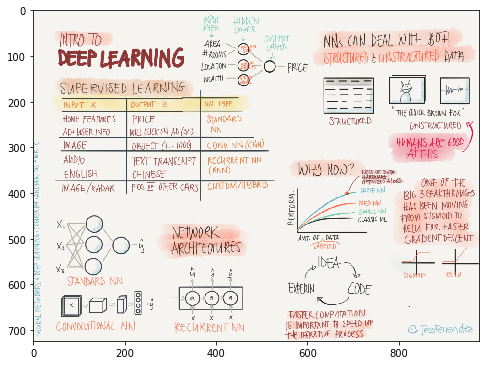

In [10]:
#codes from Endi Niu @niuddd
img = cv2.imread('/kaggle/input/data-science-cheat-sheets/Images/coursera-deep-learning.PNG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(8,8))
plt.imshow(img)

My Tika is broken. Therefore I couldn't perform with Tika.

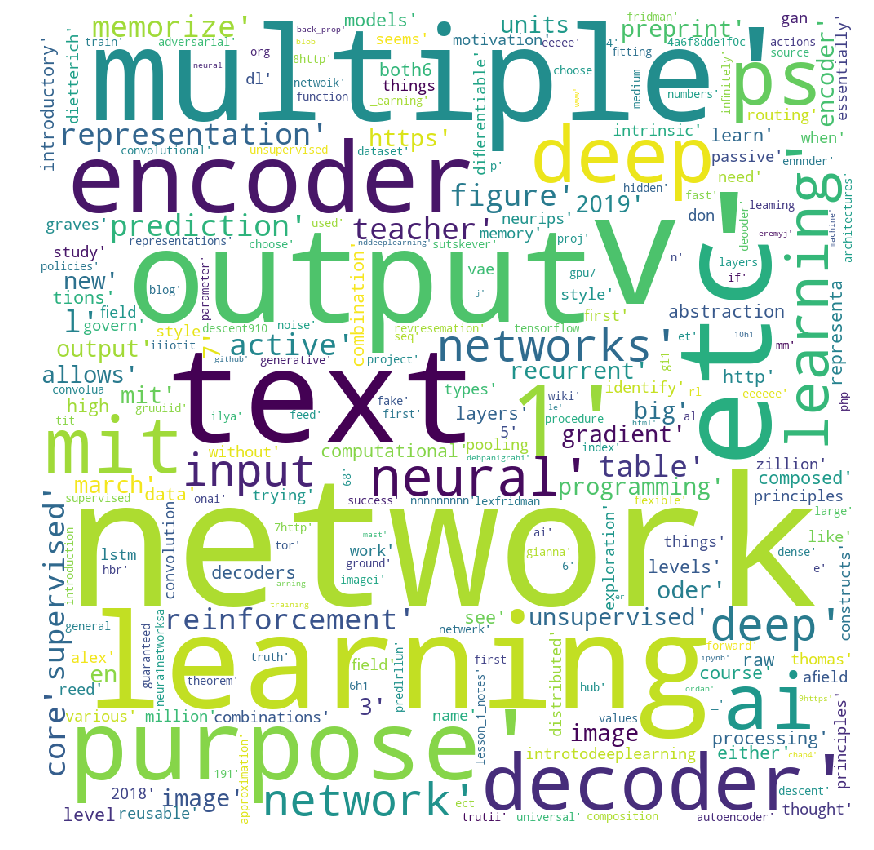

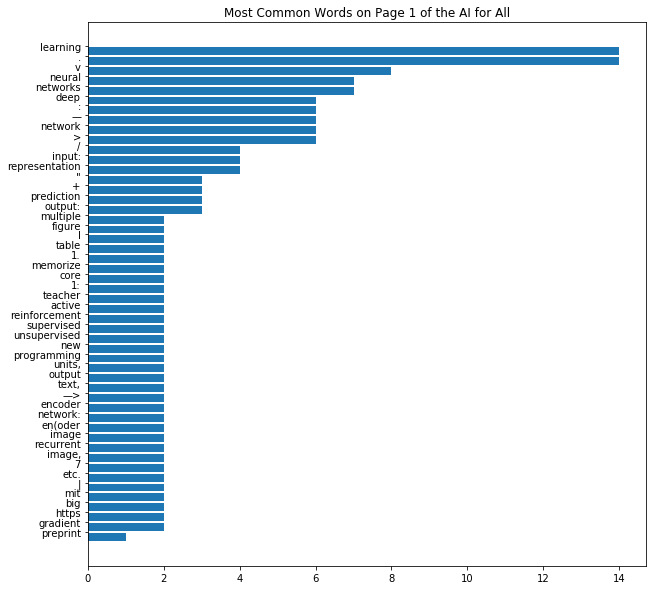

In [11]:
# Plot WordCloud of page 1
plt.figure(figsize=(15,15))
wordCloudFunction(df.T,0,10000000)
plt.figure(figsize=(10,10))
wordBarGraphFunction(df.T,0,"Most Common Words on Page 1 of the AI for All")

Just in case We find files with many pages. The following codes to explore pages 289-291 from the Mueller Report. 

Docker and Kubernetes

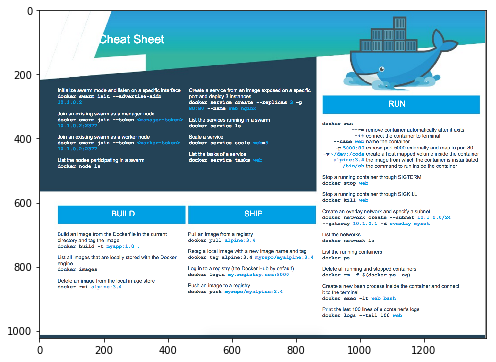

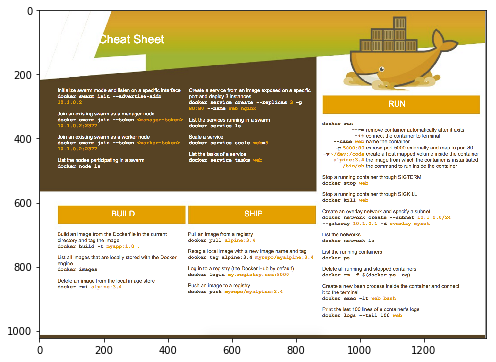

In [12]:
#codes from Endi Niu @niuddd
img = cv2.imread('/kaggle/input/data-science-cheat-sheets/Docker and Kubernetes/docker-cheat-sheet.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(8,8))
plt.imshow(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(8,8))
plt.imshow(img)

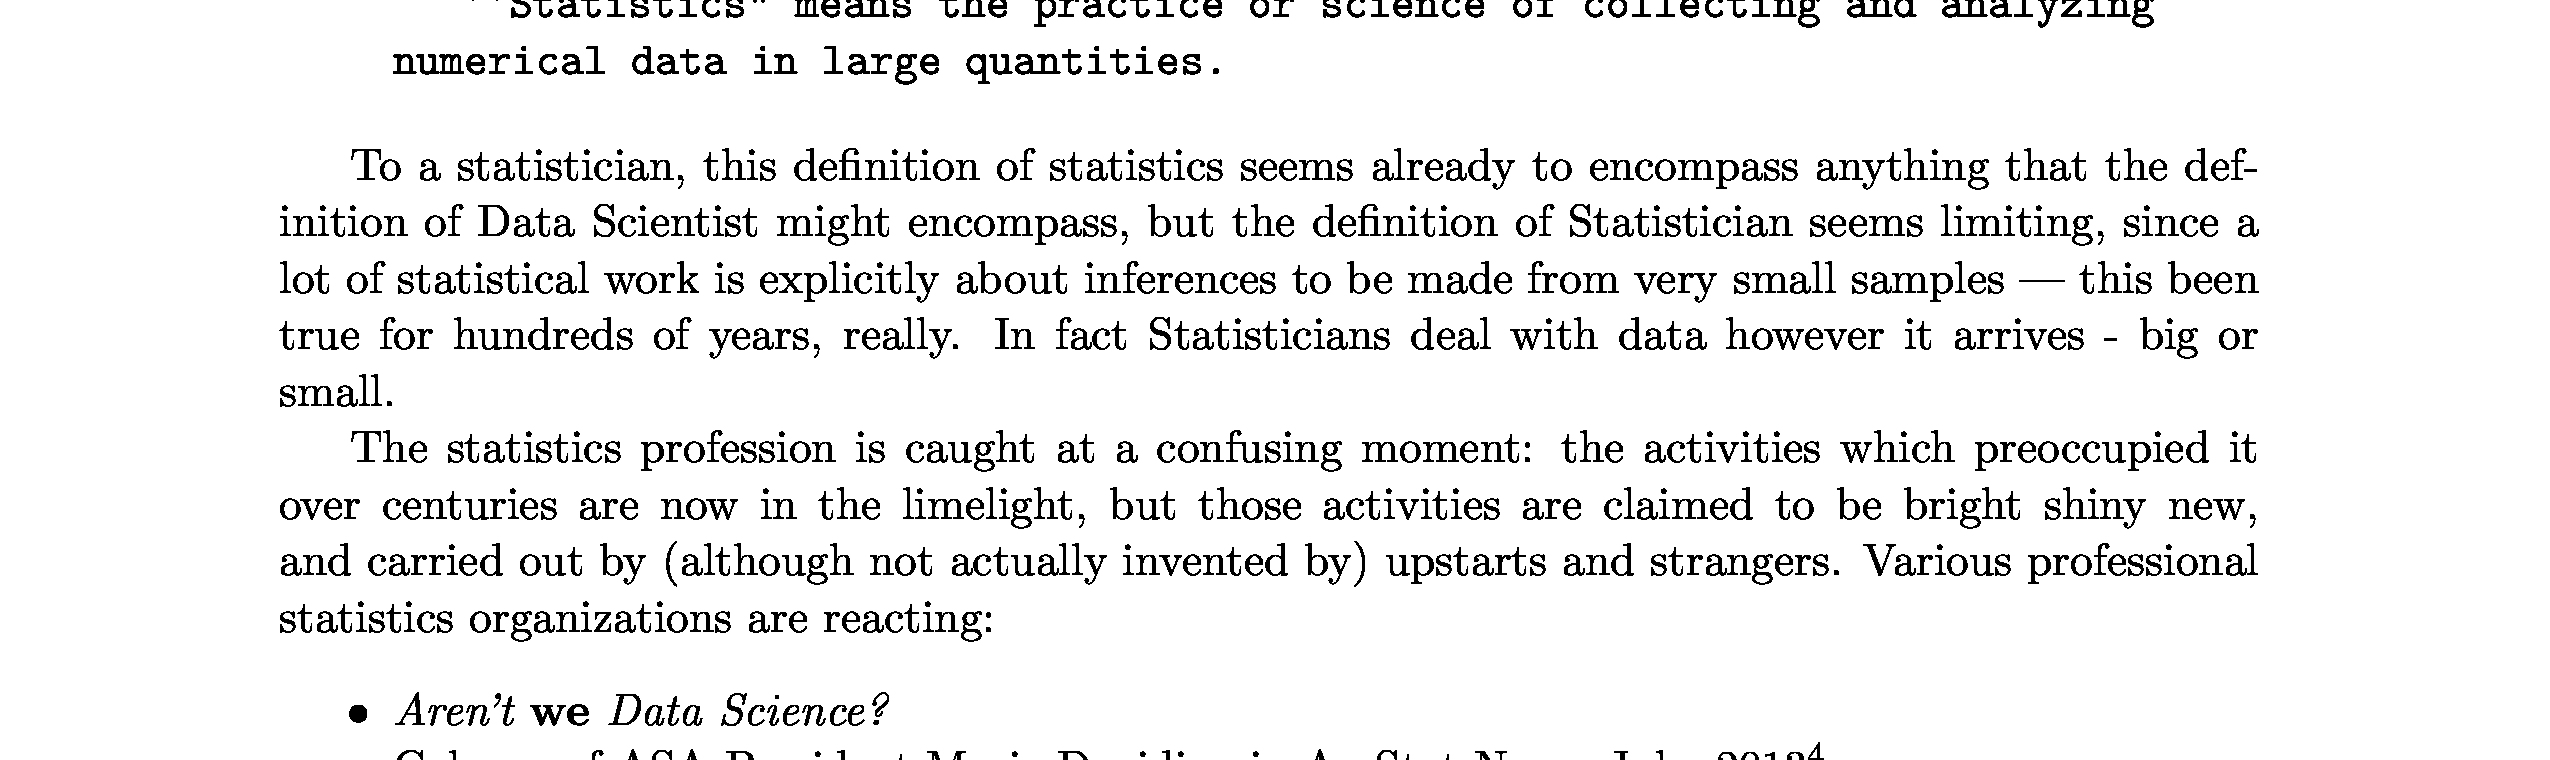

In [13]:
#Explore page 4 - Mueller Report. Here I don't know how many pages each Cheat Sheet has (probably 1) 
w, h = pdfimage4.size # crop image
pdfimage4.crop((0, 1240, w, h-1300)) # display exerpt of PDF

DevOps

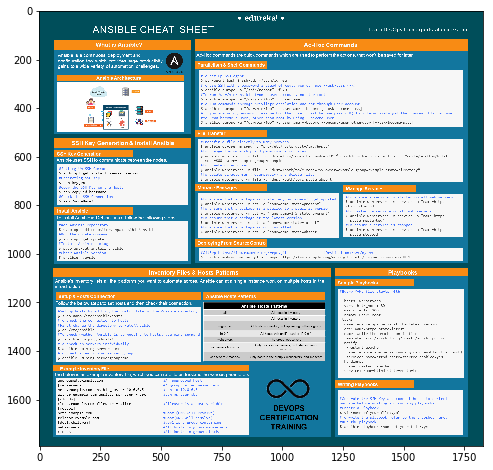

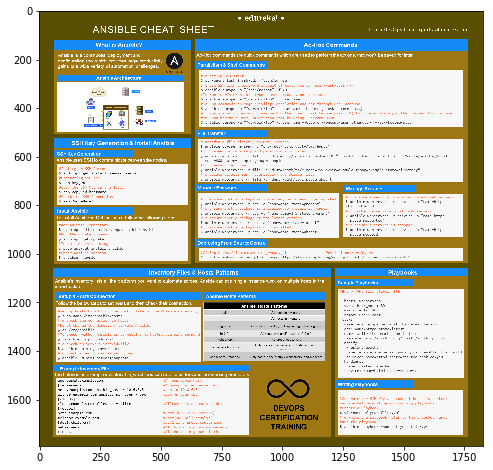

In [14]:
#codes from Endi Niu @niuddd
img = cv2.imread('/kaggle/input/data-science-cheat-sheets/DevOps/Ansible-Cheat_Sheet_Edureka.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(8,8))
plt.imshow(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(8,8))
plt.imshow(img)

In [15]:
# PDF to JPG for p4
pdf = os.path.join(outputFolder,'50YearsDataScience-1533532686598.pdf[4]')
with Img(filename=pdf, resolution=300) as img:
    img.compression_quality = 99
    img.convert("RGBA").save(filename='/kaggle/working/50YearsDataScience-15335326865984.jpg')
pdfimage4 = Image.open('/kaggle/working/50YearsDataScience-15335326865984.jpg')

In [16]:
# PDF to JPG for p5
pdf = os.path.join(outputFolder,'50YearsDataScience-1533532686598.pdf[5]')
with Img(filename=pdf, resolution=300) as img:
    img.compression_quality = 99
    img.convert("RGBA").save(filename='/kaggle/working/50YearsDataScience-15335326865985.jpg')
pdfimage5 = Image.open('/kaggle/working/50YearsDataScience-15335326865985.jpg')

#Convert PDF to CSV

In [17]:
# Parse a PDF file and convert it to CSV using PyTesseract (p4)
text = pytesseract.image_to_string(pdfimage4)
df = pd.DataFrame([text.split('\n')])
df.drop(df.iloc[:, 27:], inplace=True, axis=1)
df.drop(df.iloc[:, :3], inplace=True, axis=1)
df.columns = range(df.shape[1])

Since I got no module Tika, I couldn't parse,combine. Then, NO PDF to CSV for now.

In [18]:
!pip install tika
import tika
from tika import parser

ERROR: Could not find a version that satisfies the requirement tika (from versions: none)
ERROR: No matching distribution found for tika


ModuleNotFoundError: No module named 'tika'

In [19]:
#parsed = parser.from_file('/kaggle/working/50YearsDataScience-153353268659854.jpg')

In [20]:
#text = parsed["content"]
#df2 = pd.DataFrame([text.split('\n')])
#df2.drop(df2.iloc[:, 1:50], inplace=True, axis=1)
#df2.drop(df2.iloc[:, 26:], inplace=True, axis=1)
#df2.columns = range(df2.shape[1])

In [21]:
#dfcombined = pd.concat([df, df2]) 

In [22]:
# Page 4-5
#dfcombined.head() # preview csv of 4

Linux

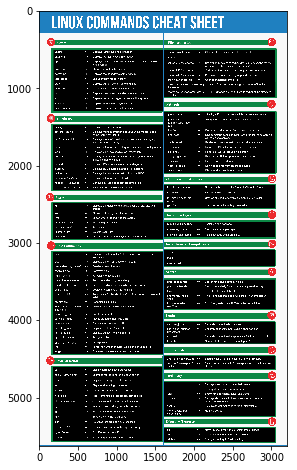

In [23]:
#codes from Endi Niu @niuddd
img = cv2.imread('/kaggle/input/data-science-cheat-sheets/Linux/Linux.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(8,8))
plt.imshow(img)

*Clean up Notebook*  - Another failure: zip not found.   Probably zip went to the same place that Tika. That's tricky.

In [24]:
# Clean up the notebook
!apt-get install zip # install zip
!zip -r pdfs.zip /kaggle/working/pdfs/ # zip up a few files
!rm -rf pdfs/* # remove everything else




The following NEW packages will be installed:
  zip
0 upgraded, 1 newly installed, 0 to remove and 32 not upgraded.
Need to get 234 kB of archives.
After this operation, 623 kB of additional disk space will be used.
Err:1 http://deb.debian.org/debian stretch/main amd64 zip amd64 3.0-11+b1
  Temporary failure resolving 'deb.debian.org'
E: Failed to fetch http://deb.debian.org/debian/pool/main/z/zip/zip_3.0-11+b1_amd64.deb  Temporary failure resolving 'deb.debian.org'
E: Unable to fetch some archives, maybe run apt-get update or try with --fix-missing?
/bin/sh: 1: zip: not found


Kaggle Notebook Runner: Marília Prata @mpwolke